In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

league_data_cleaned = pd.read_csv('data/league_data_cleaned.csv')

In [3]:
# We can extract the data in this format from pandas like this:
column_names = league_data_cleaned.columns.tolist()
column_names = column_names[1:-1]

all_inputs = league_data_cleaned[column_names].values

# Similarly, we can extract the class labels
all_labels = league_data_cleaned['blueWin'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]

# Here's what a subset of our inputs looks like:
all_inputs[:(len(column_names) +1)]

array([[    -4,    -11,    -12,      2,      0,     -2,      0,      6,
          -400,    294, -29531,  -8690,   2559],
       [    -4,     20,     -5,      1,      0,      0,      0,      6,
          -373,    272, -28872,  -2468,  -6055],
       [    -1,   -222,     -5,     -1,      0,     -2,      0,      8,
          -340,    247, -30414,  -1338, -13483],
       [     3,      5,     -2,     -1,      1,      1,      0,      4,
          -377,    268, -25073,  -3736,   2237],
       [    -4,      4,      4,      0,      1,      0,      0,      2,
          -382,    274, -25952,  -1703,  11821],
       [     1,     -9,    -12,     -2,     -1,     -3,      0,     13,
          -357,    299, -28288,  -6411,  -4095],
       [     0,   -106,      6,      2,      0,      0,      0,      5,
          -403,    235, -28488,  -2114,   -988],
       [     0,      7,      6,      1,      0,      0,      0,      6,
          -358,    292, -24001,  -1501,   7191],
       [     0,      7,     -4, 

In [4]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
classifier = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training set
classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
classifier.score(testing_inputs, testing_classes)

0.6695293146160198

We will experiment now 1000 times the classifier and draw a histogram of the accuracie

(array([  7.,  16.,  74., 168., 230., 240., 177.,  76.,   8.,   4.]),
 array([0.6478943 , 0.65175888, 0.65562345, 0.65948803, 0.6633526 ,
        0.66721718, 0.67108175, 0.67494633, 0.6788109 , 0.68267547,
        0.68654005]),
 <BarContainer object of 10 artists>)

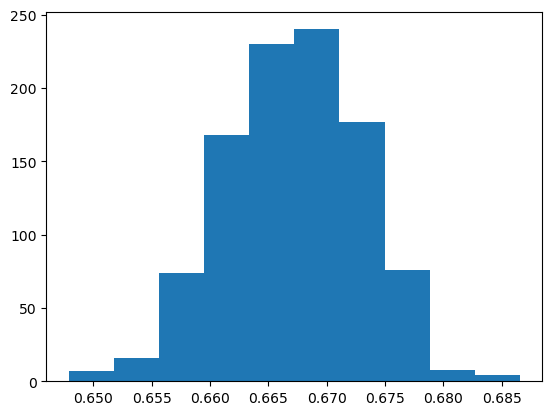

In [6]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    classifier = DecisionTreeClassifier(random_state=0)

    classifier.fit(training_inputs, training_classes)

    model_accuracies.append(classifier.score(testing_inputs, testing_classes))

plt.hist(model_accuracies)

Text(0.5, 1.0, 'Average score: 0.6652067257628425')

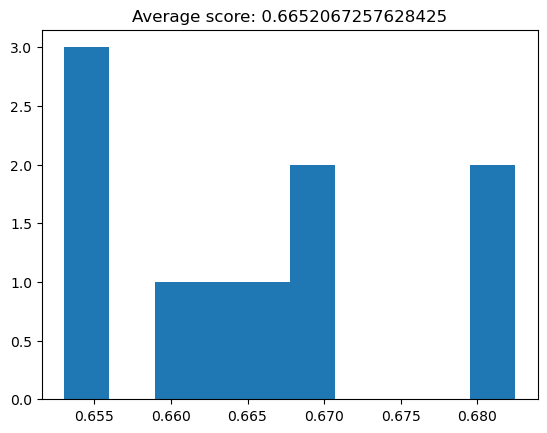

In [7]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Text(0.5, 1.0, 'Average score: 0.7317278519805541')

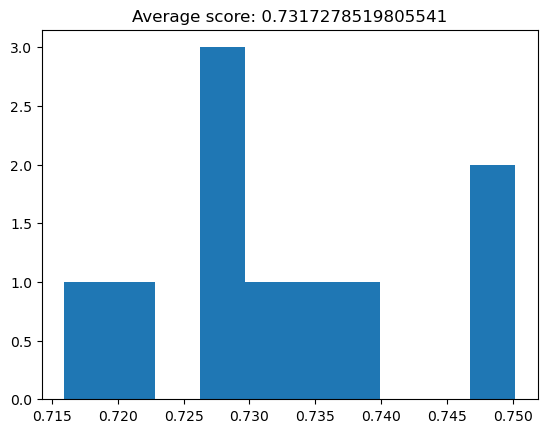

In [8]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [9]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                  'max_features': [1,2,3,4,5,6,7,8,9,10,11,12,13]}

In [10]:
# Simple GridSearch and visual representation

grid_search = GridSearchCV( decision_tree_classifier, parameter_grid)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7443627338563
Best parameters: {'max_depth': 6, 'max_features': 6}
